In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/OneDrive/Documents/Injury Dataset/2013-2022/2018-2022 Data Cleaned Trainable.csv')

X = pd.DataFrame(dataset.iloc[:,:22].values)
Y = pd.DataFrame(dataset.iloc[:,22:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

       0   1   2   3   4   5   6   7   8   9   ...  12  13  14   15  16  17  \
0       1   1   1   1   0   1   3  55   1   1  ...   0   0   1    0   0   1   
1       1   1   1   1   0   1   0  16   1   1  ...   0   0   1    0   0   1   
2       1   1   1   1   3   0   3  41   1   1  ...   0   1   1    0   1   1   
3       1   1   2   2   3   0   0  21   2   1  ...   0   0   1    0   0   1   
4       1   1   2   1   3   0   1  66   1   1  ...   0   0   1  174   0   1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ..   
44090   2   4   1   2   0   1   0  53   1   1  ...   1   0   1    0   0   1   
44091   2   4   1   2   0   1   2  27   1   1  ...   1   0   1    0   1   1   
44092   2   4   1   2   1   0   1  25   1   1  ...   1   1   1  155   0   1   
44093   2   4   1   2   1   0   1  21   2   1  ...   1   1   1  120   0   0   
44094   2   4   1   1   0   1   1  43   1   1  ...   0   1   1   70   1   1   

       18  19  20  21  
0       2   2   3   1  
1  

In [2]:
features = pd.DataFrame(dataset.iloc[:,:32])
features = features.columns
print(features)

Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [3]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier 

import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

c:\Users\eddie\anaconda3\envs\SSTP-Injury\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "loss": trial.suggest_categorical("loss", ["log_loss"]),
        "criterion": trial.suggest_categorical("criterion", ["friedman_mse", "squared_error"])
    }

    clf = GradientBoostingClassifier(**params, random_state=42)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train, Y_train, cv=cv, scoring="accuracy", n_jobs=-1)

    return np.mean(scores)

study = optuna.create_study(study_name = "GB", direction="maximize", storage = "sqlite:///gb.db")
study.optimize(objective, n_trials=50)

print("Best Accuracy: {study.best_value:.4f}")
print("Best Hyperparameters: ")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

[I 2025-05-30 22:52:57,984] A new study created in RDB with name: GB
[I 2025-05-30 22:53:52,776] Trial 0 finished with value: 0.9200023222140261 and parameters: {'n_estimators': 275, 'learning_rate': 0.09037395169330105, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 19, 'subsample': 0.9622040032062011, 'loss': 'log_loss', 'criterion': 'friedman_mse'}. Best is trial 0 with value: 0.9200023222140261.
[I 2025-05-30 22:54:03,039] Trial 1 finished with value: 0.9200023503377255 and parameters: {'n_estimators': 108, 'learning_rate': 0.01078880364635281, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 2, 'subsample': 0.6388872720500327, 'loss': 'log_loss', 'criterion': 'friedman_mse'}. Best is trial 1 with value: 0.9200023503377255.
[I 2025-05-30 22:54:15,342] Trial 2 finished with value: 0.9249632744664131 and parameters: {'n_estimators': 77, 'learning_rate': 0.032560831285628256, 'max_depth': 8, 'min_samples_split': 16, 'min_samples_leaf': 11, 'subsample': 0.683427

Best Accuracy: {study.best_value:.4f}
Best Hyperparameters: 
  n_estimators: 201
  learning_rate: 0.05933916118599327
  max_depth: 4
  min_samples_split: 3
  min_samples_leaf: 10
  subsample: 0.7125491489246442
  loss: log_loss
  criterion: squared_error


In [4]:
model = GradientBoostingClassifier(
    n_estimators = 201,
    learning_rate = 0.05933916118599327,
    max_depth = 4,
    min_samples_split = 3,
    min_samples_leaf = 10,
    subsample = 0.7125491489246442,
    loss = "log_loss",
    criterion = "squared_error")
model.fit(X_train, Y_train)

c:\Users\eddie\anaconda3\envs\SSTP-Injury\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='squared_error',
                           learning_rate=0.05933916118599327, max_depth=4,
                           min_samples_leaf=10, min_samples_split=3,
                           n_estimators=201, subsample=0.7125491489246442)

In [5]:
res = model.predict(X_test)
print(res)
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

[0 1 2 ... 2 2 2]
       0
42222  0
29490  1
7168   2
35124  1
29931  2
...   ..
41573  2
22780  0
42708  2
28199  2
22171  2

[8819 rows x 1 columns]
0.921873228257172
              precision    recall  f1-score   support

           0   0.787353  0.785891  0.786621      1616
           1   0.793186  0.794611  0.793898      1670
           2   1.000000  1.000000  1.000000      5533

    accuracy                       0.921873      8819
   macro avg   0.860180  0.860167  0.860173      8819
weighted avg   0.921871  0.921873  0.921872      8819



PermutationExplainer explainer: 8820it [43:42,  3.36it/s]                            
C:\Users\eddie\AppData\Local\Temp\ipykernel_54580\1552002207.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)


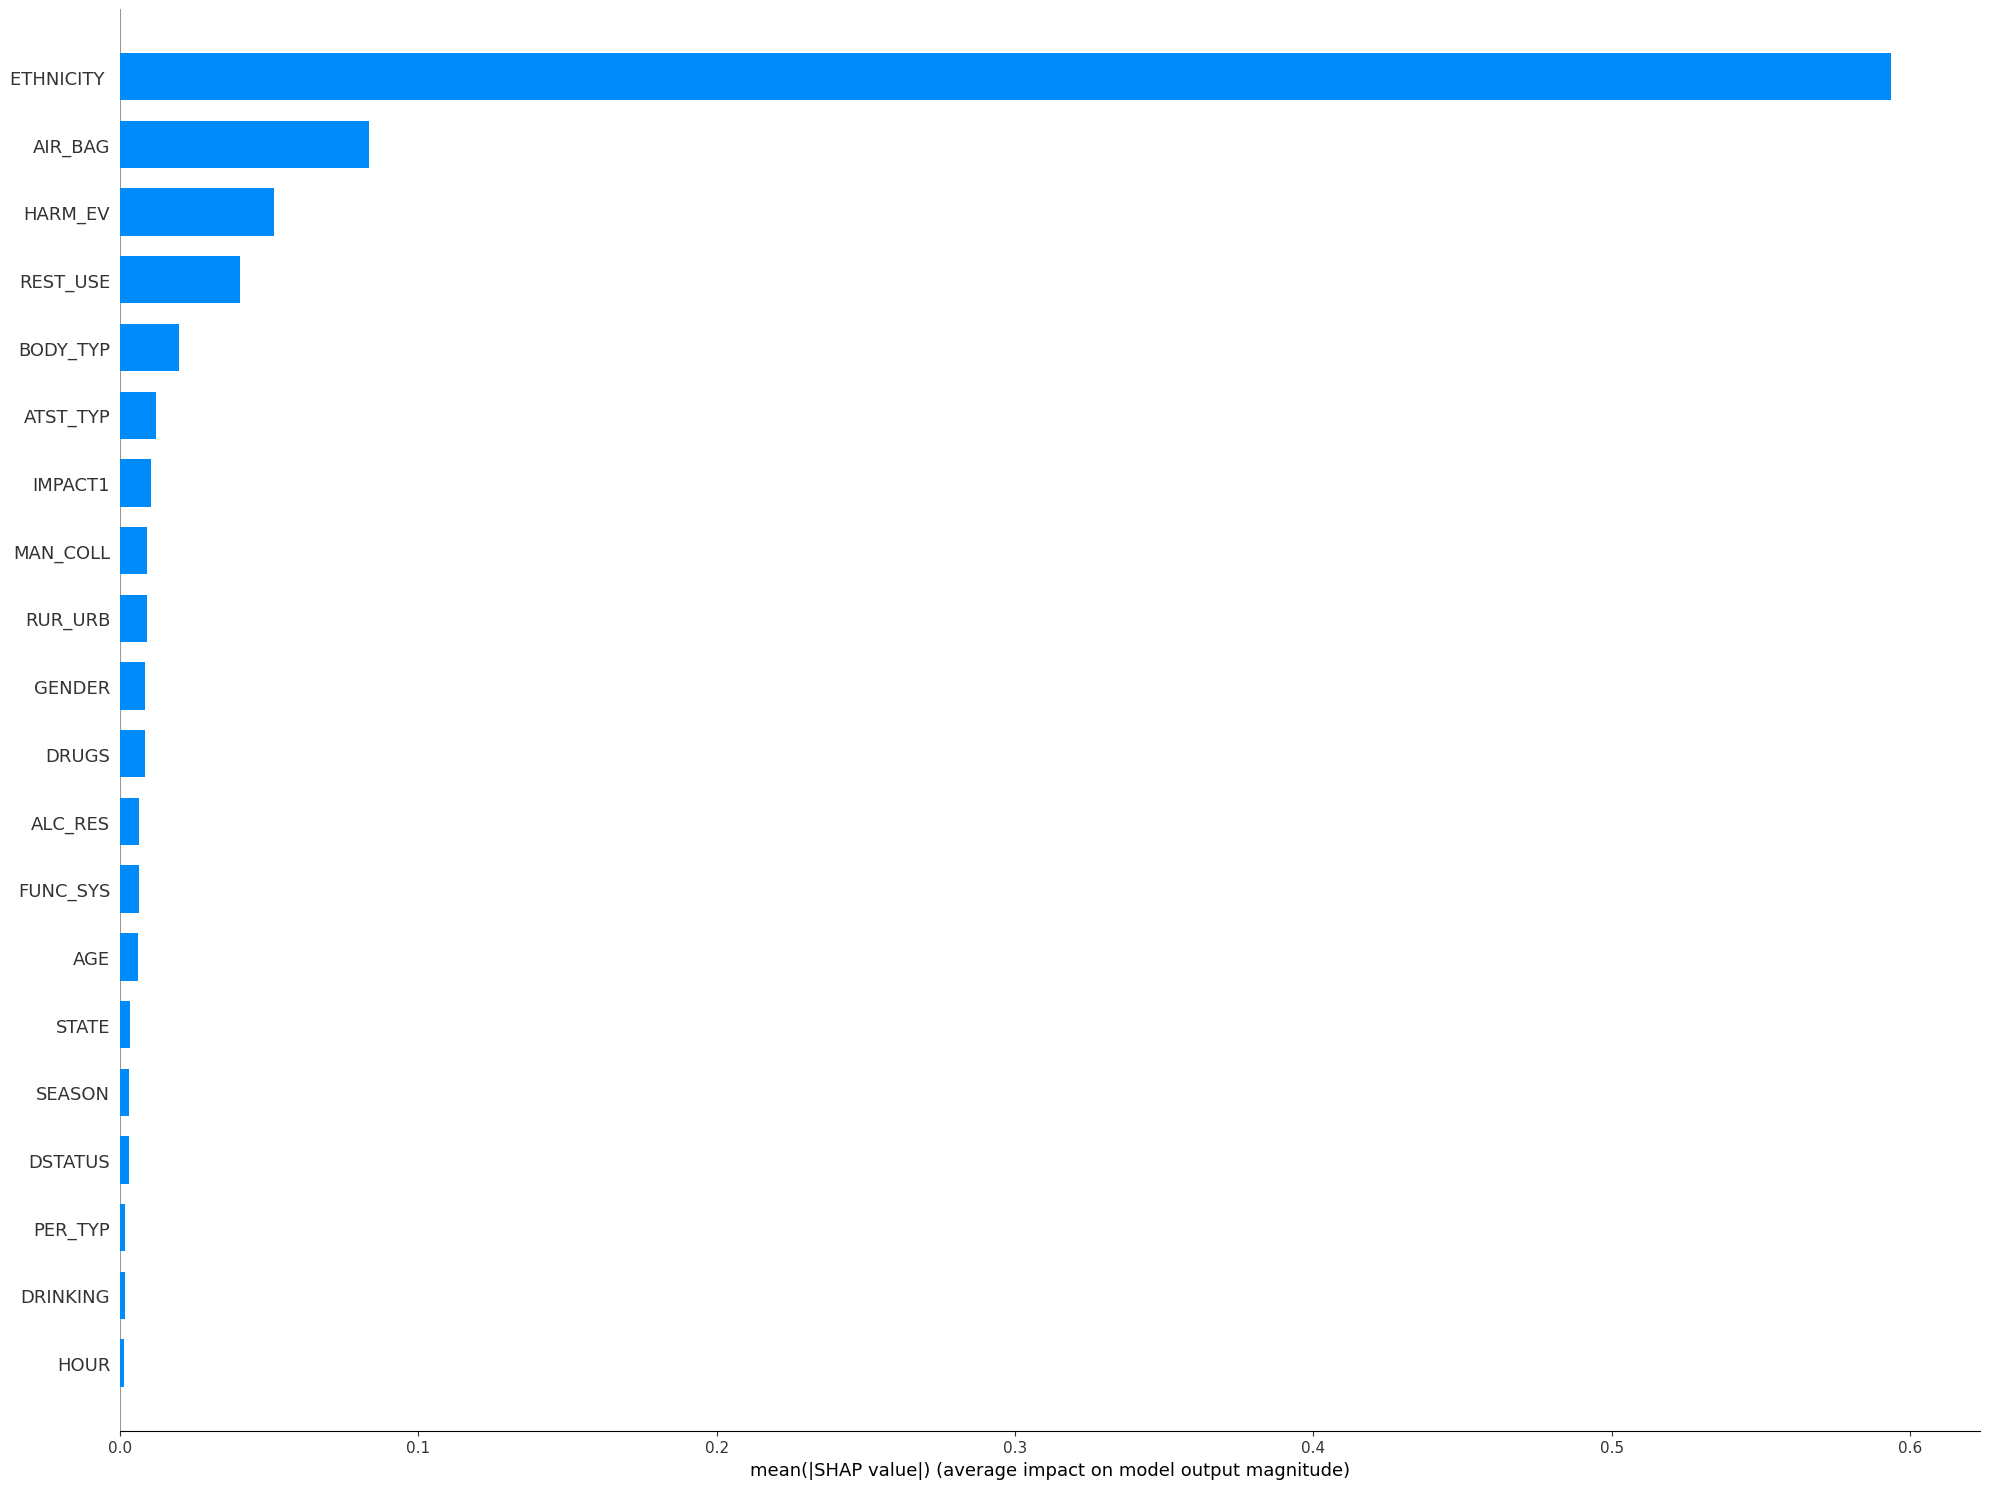

In [9]:
import shap 
explainer = shap.Explainer(model.predict,X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)

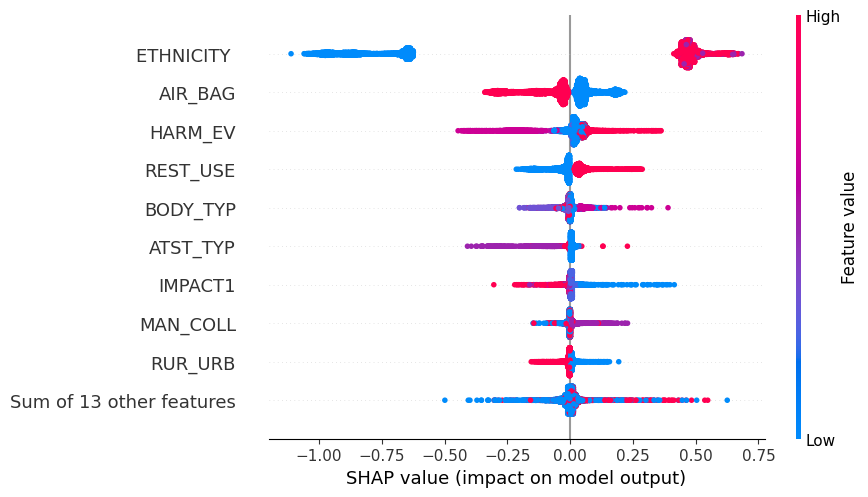

In [10]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)

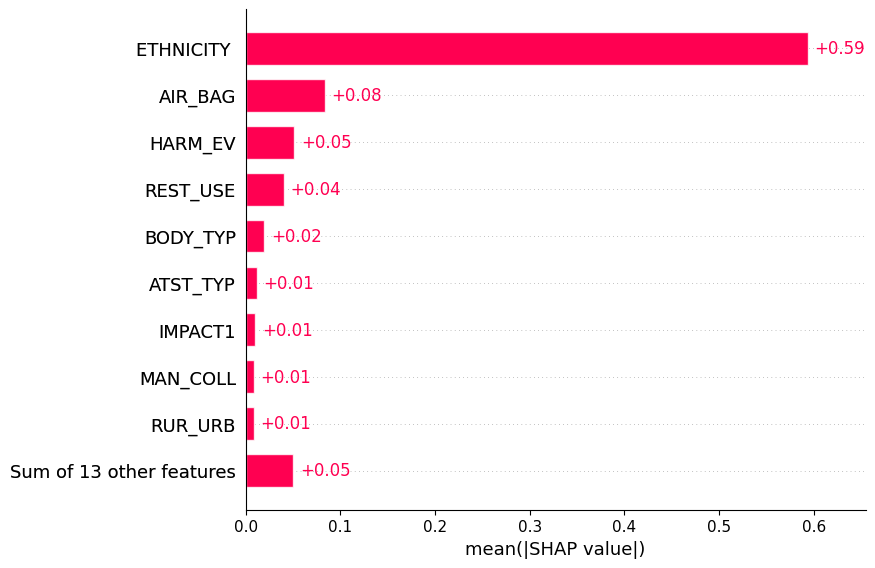

In [11]:
shap.plots.bar(explanation)

In [12]:
import matplotlib.pyplot as plt
import os

indices = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
for i in indices:
    shap.plots.waterfall(explanation[i], show=False)
    plt.savefig(os.path.join("shap/gb/waterfall", f"waterfall_{i}.png"), dpi = 300,bbox_inches="tight")
    plt.close()


In [14]:
import matplotlib.pyplot as plt
import os

indices = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
for i in indices:
    shap.force_plot(shap_values[i],feature_names=['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP', 'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG', 'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ', 'RUR_URB', 'FUNC_SYS', 'IMPACT1'], matplotlib=True, show=False)
    plt.savefig(os.path.join("shap/gb/force/", f"force_{i}.png"), dpi = 300,bbox_inches="tight")
    plt.close()


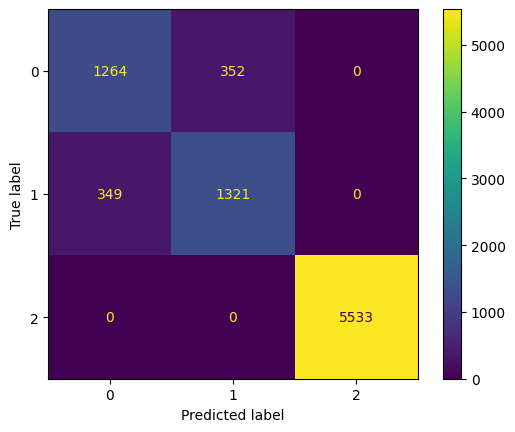

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix)
cm_display.plot()
plt.show()

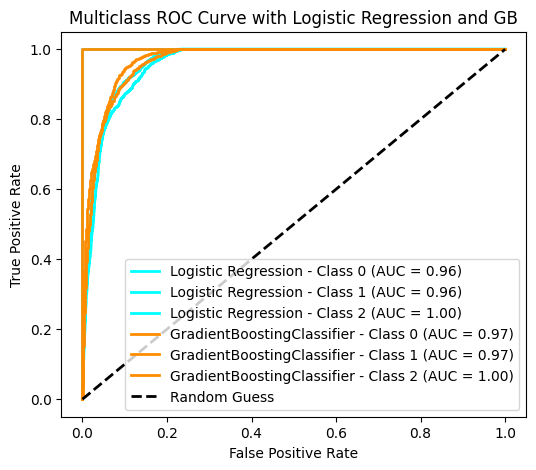

In [7]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

logistic_model = OneVsRestClassifier(LogisticRegression(random_state=42))
logistic_model.fit(X_train, Y_train)

fpr = dict()
tpr = dict()
roc_auc = dict()

y_test = label_binarize(Y_test, classes=np.unique(Y_test))
models = [logistic_model, model]

plt.figure(figsize=(6, 5))
colors = cycle(['aqua', 'darkorange'])

for m, color in zip(models, colors):
    for i in range(m.classes_.shape[0]):
        fpr[i], tpr[i], _ = roc_curve(
            y_test[:, i], m.predict_proba(X_test)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        name = m.__class__.__name__
        if(m.__class__.__name__=="OneVsRestClassifier"):
            name = "Logistic Regression"
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{name} - Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with Logistic Regression and GB')
plt.legend(loc="lower right")
plt.show()